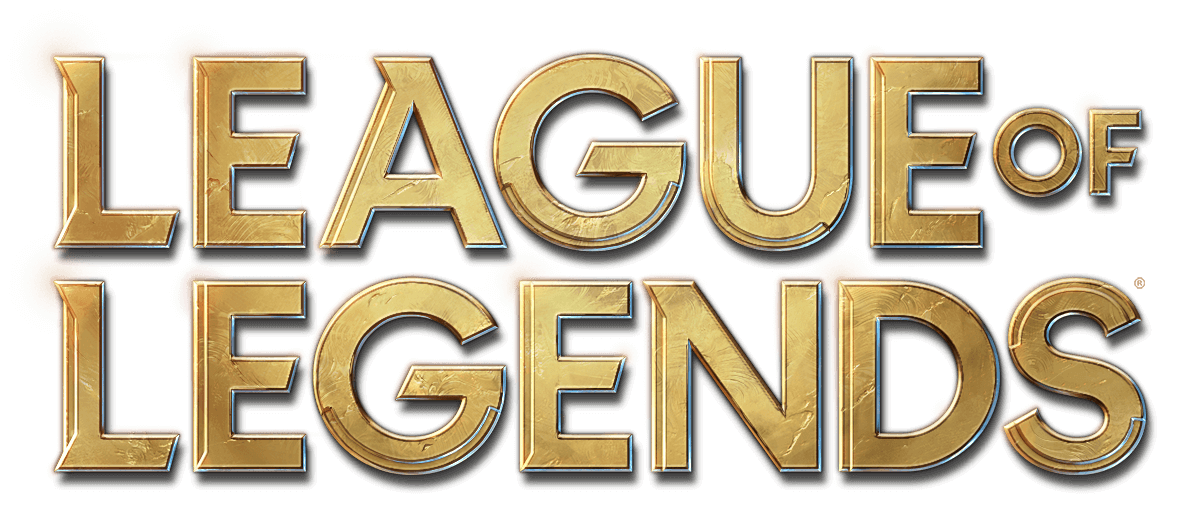

#### Project proposal


League of Legends is an online video games played by 117 million worldwide. The game consist of 2 teams fighting each other, the one who kills the other's base first wins the game.  E-sports is an up-and-coming business opportunity. Growing bigger by the day. A lot of money goes into League of Legends esport. Companies invest in e-sport teams that compete in tournaments yearly. Developing a program that could possibly improve the teams' performance  in those tournaments, comparing data to see on what aspect they need to improve upon, To win a game, Could be a very profitable project.

##### Why are we going to it

League players are very competitive, they always look for a way to improve their skills. There is already a big market of apps aimed at league players to improve their skills. Making an app predicting the outcome of your game based on certain statistics has large potential, not only for the individual league player, but also in the esports market.

##### What is exactly what we are going to do?

A lot of different statistics go into a single game of league. Some seem to have more impact than others. People assume that if one team has more kills than the other, that team will win. But the amount of data actually impacting the winning of a game might surprise you.
By gathering these statistics, we are able to presume if a team will win the game or not.


## can we predict the outcome of a game based on the first 10 minutes?

League of Legends is a widely popular online game, it also has a big scene in e-sports. A lot of money is put on the line for teams to win a game. 1 game usually lasts from 20 minutes to 40 minutes. The first 10 minutes of the game are typically just the beginning. But if you could predict the outcome of the game just based on these short moments. It could bring a lot of profit to people with access to this data. And might help you in the future when you find yourself in a game of league.

The dataset includes various variables, they all represent actions taken in the game that help your team or hinder the enemy team. The obvious choice would be to look at kills, but I will also focus on less obvious actions that dont seem that impactfull on the game. but might be able to predict the outcome regardless.

In [2]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
print('numpy version:', np.__version__)
print('pandas version:', pd.__version__)
print('scikit-learn version:', sk.__version__)
print('matplotlib version:', matplotlib.__version__)

%matplotlib inline

numpy version: 1.20.3
pandas version: 1.3.4
scikit-learn version: 0.24.2
matplotlib version: 3.4.3


In [3]:
df = pd.read_csv("C:/Users/megin/OneDrive/Documenten/Data/league.csv")
df

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9874,4527873286,1,17,2,1,7,4,5,1,1,...,0,15246,6.8,16498,229,34,-2519,-2469,22.9,1524.6
9875,4527797466,1,54,0,0,6,4,8,1,1,...,0,15456,7.0,18367,206,56,-782,-888,20.6,1545.6
9876,4527713716,0,23,1,0,6,7,5,0,0,...,0,18319,7.4,19909,261,60,2416,1877,26.1,1831.9
9877,4527628313,0,14,4,1,2,3,3,1,1,...,0,15298,7.2,18314,247,40,839,1085,24.7,1529.8


## Data analyses

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

All of the above collumns represent different game actions. We can see who won the game by looking at the "wins" collumn. This collumn is going to be our target variable.

### Analysing and visualising the data

Since this dataset includes both red team and blue teams data, its double up, because if blue loses the game, red automatically wins the game. so we dont need both the teams data. for now we will be focusing on the blue teams data.

In [5]:
stats = df[['blueWins','blueWardsPlaced','blueFirstBlood','blueKills','blueDeaths','blueAssists','blueEliteMonsters','blueDragons']]
stats.columns

Index(['blueWins', 'blueWardsPlaced', 'blueFirstBlood', 'blueKills',
       'blueDeaths', 'blueAssists', 'blueEliteMonsters', 'blueDragons'],
      dtype='object')

To better understand you dataset, it good to plot some graphs to visualize everything a bit better for your own understanding

In [20]:
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()
names = stats.columns
norm = scaler.fit_transform(stats)
norm_stats = pd.DataFrame(norm, columns=names)
norm_stats.head()


,blueWins,blueWardsPlaced,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons
0,0.0,0.093878,1.0,0.409091,0.272727,0.379310,0.0,0.0
1,0.0,0.028571,0.0,0.227273,0.227273,0.172414,0.0,0.0
2,0.0,0.040816,0.0,0.318182,0.500000,0.137931,0.5,1.0
3,0.0,0.155102,0.0,0.181818,0.227273,0.172414,0.5,0.0
4,0.0,0.285714,0.0,0.272727,0.272727,0.206897,0.0,0.0


When we dont use normalized data we cant actually read any of the values properly. when normalized you can see the clear lines connection, when not normalized its just one big blob.

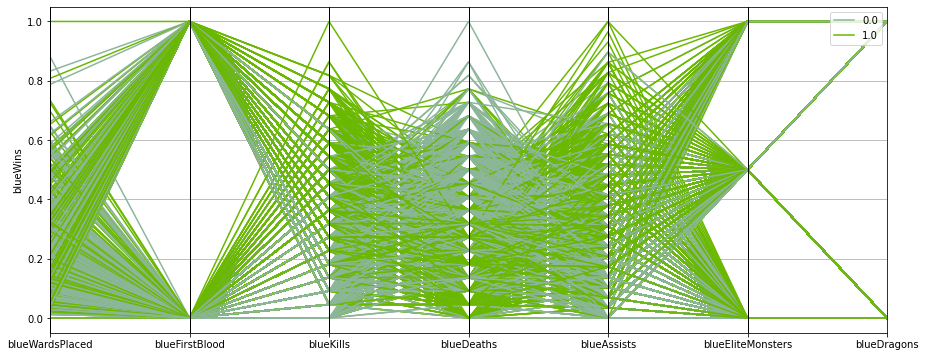

In [18]:
fig = plt.figure(figsize=[15,6])
from pandas.plotting import parallel_coordinates
ax = parallel_coordinates(norm_stats,'blueWins')
ax.set_ylabel('blueWins');
plt.show()

This parralel coordinate gives you allot of information. for example, you can see if you get more kills you have less deaths, and ofcourse if you have less kills you have more deaths, and allot more loss(o) when you have more deaths

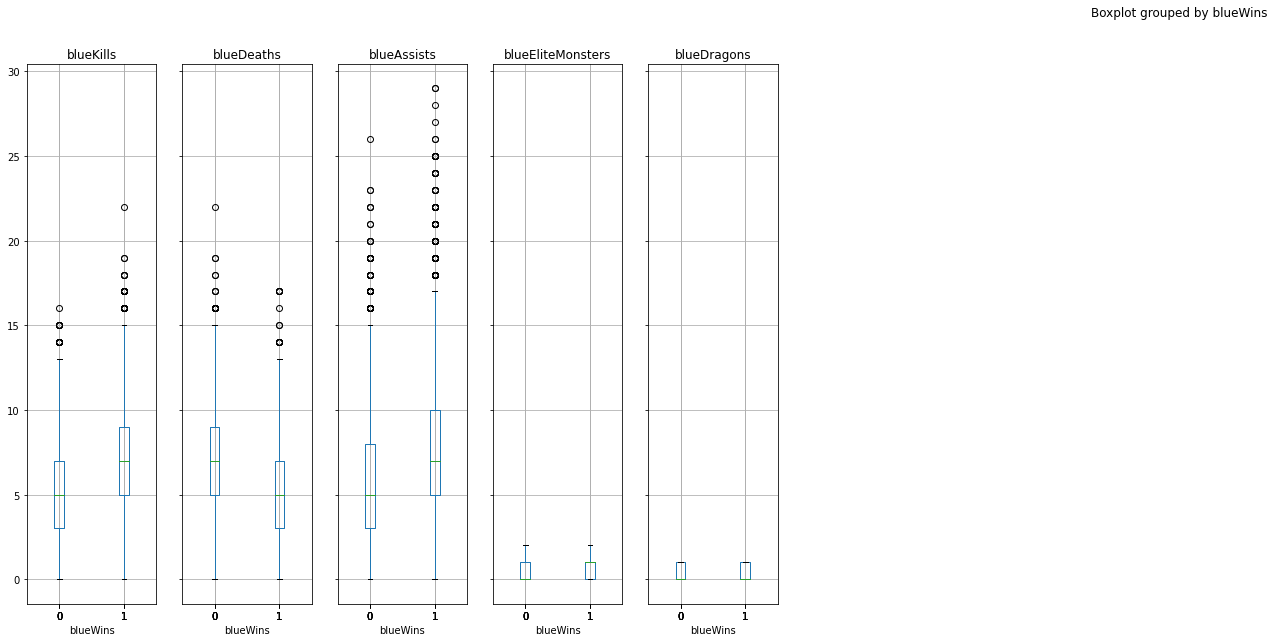

In [6]:
features = tuple(df.columns[5:10].values)
df.boxplot(column=features, by='blueWins', figsize=(40,10), layout=(1,15));
#here we are boxplotting the data to visualize and see with which variable we could best use our machine learning on
#We compare if blue wins(1) or not (0), bad choice of variable would we for exmaple blueEliteMonsters and blueDragons.

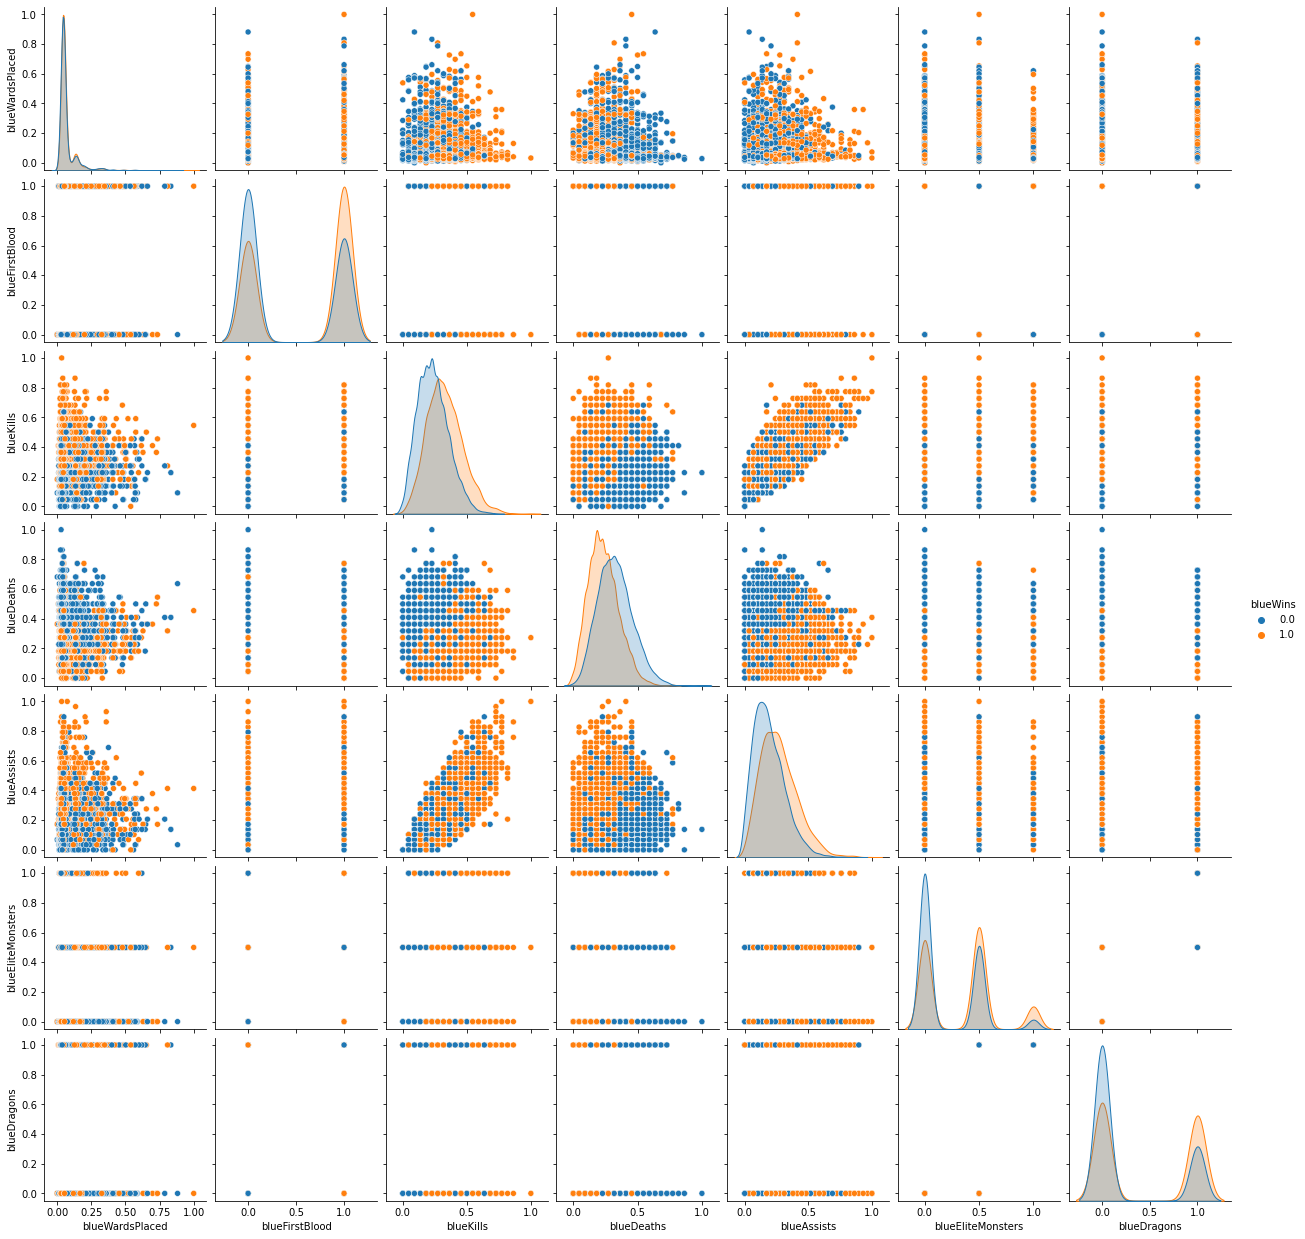

In [21]:
import seaborn as sns
sns.pairplot(norm_stats, hue="blueWins")

To better visualize the data and see which variables are usable, you can plot a pairplot, here you can see all of the collumns compared to one another. BY looking at the scattter plots, you can tell which one has the better compatilibilty with nearest neighbor. if the blue and ornage dots are totally scattered throughour eachother its not a good choice. for example. blueAssist with blueWardsplaced looks very chaotic and nearest neighbor wont work on this, the accuracy would be very low. compared with blueDeaths with blueKills, you can clearly differentiate the two colors, there for this one would be a nice choice for nearest neighbor.

For now we will go with blueKills and blueDeaths, since blueAssist has allot of outliers. So we will check if the amount of kills and deaths a teams gets in the first 10 minutes of a game, can predict if the team wins or loses.

###  Selecting features (and scaling them)
We will select the two features and scale each feature linearly with standard scaler.

In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics

wins: [0 1]
The length of X_stats: 9879


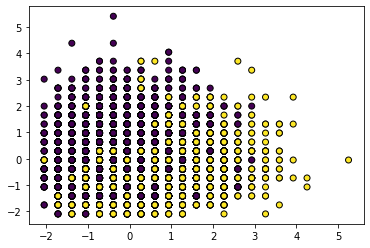

In [13]:
# Define X_iris and y_iris
X_stats = df[['blueKills', 'blueDeaths']]
y_stats = df['blueWins']
print('wins:', df['blueWins'].unique())

# Normalize
scaler_stats = StandardScaler().fit(X_stats)
X_stats = scaler_stats.transform(X_stats)
print('The length of X_stats: {}'.format(len(X_stats)))

plt.scatter(X_stats[:,0], X_stats[:,1], edgecolors='black', c=y_stats)

#### Dividing your data into a training and test set

In [63]:
X_train_stats, X_test_stats, y_train_stats, y_test_stats = train_test_split(X_stats, y_stats, test_size=0.25)
print('Train shape:', X_train_stats.shape, y_train_stats.shape)
print('Test shape:', X_test_stats.shape, y_test_stats.shape)

Train shape: (7409, 2) (7409,)
Test shape: (2470, 2) (2470,)


#### Machine learning algorithm

In [64]:
from sklearn.neighbors import KNeighborsClassifier

In [65]:
## we create an instance of Neighbours Classifier and fit the data.
clf_stats = KNeighborsClassifier(5)
clf_stats.fit(X_train_stats, y_train_stats)

KNeighborsClassifier()

In [67]:
#Evaluate performance (with test set)
print('Number of test points: ',X_test_stats.size)
y_pred_stats = clf_stats.predict(X_test_stats)

Number of test points:  4940


In [68]:
metrics.accuracy_score(y_test_stats, y_pred_stats)

0.6720647773279352

Satisfactory result, we might be able to do better. For example by using different collumns, or testing if redWins is any different than blueWins. For iteration zero I will leave it at this, and improve with future given feedback.


Megin van Herk